 Data here is based on  (CPCB - India Central Pollution Control Board)


# Realtime pollution analysis

api : http://api.waqi.info/

Get your api key from here : https://aqicn.org/data-platform/token/#/

Getting data

In [1]:
import requests

In [2]:

city='pune'
url='http://api.waqi.info/feed/' + city + '/?token='
manasapi_key='YOURAPIKEY'
mainurl=url+manasapi_key
r=requests.get(mainurl)
data=r.json()['data']#data extraction json ke through dictionary format me store  and accessing keys
data

{'aqi': 232,
 'idx': 3760,
 'attributions': [{'url': 'http://safar.tropmet.res.in/',
   'name': 'SAFAR - System of Air Quality Forecasting, Indian Institute of Tropical Meteorology, India',
   'logo': 'India-IITM.png'},
  {'url': 'http://cpcb.nic.in/',
   'name': 'CPCB - India Central Pollution Control Board',
   'logo': 'India-CPCB.png'},
  {'url': 'https://waqi.info/', 'name': 'World Air Quality Index Project'}],
 'city': {'geo': [18.529603, 73.849586],
  'name': 'Shivajinagar, Pune, Pune, India',
  'url': 'https://aqicn.org/city/pune/shivajinagar'},
 'dominentpol': 'pm25',
 'iaqi': {'co': {'v': 51},
  'dew': {'v': 20.6},
  'h': {'v': 92.9},
  'no2': {'v': 198},
  'o3': {'v': 61},
  'p': {'v': 945.9},
  'pm10': {'v': 138},
  'pm25': {'v': 232},
  't': {'v': 21.8},
  'w': {'v': 0.5}},
 'time': {'s': '2021-11-15 06:00:00',
  'tz': '+05:30',
  'v': 1636956000,
  'iso': '2021-11-15T06:00:00+05:30'},
 'forecast': {'daily': {'o3': [{'avg': 15,
     'day': '2021-11-13',
     'max': 25,
    

Extracting air quality info

In [3]:
aqi=data['aqi']
iaqi=data['iaqi']
#del iaqi['p']
for i in iaqi.items():
  print(i[0],':',i[1]['v'])

co : 51
dew : 20.6
h : 92.9
no2 : 198
o3 : 61
p : 945.9
pm10 : 138
pm25 : 232
t : 21.8
w : 0.5


In [4]:
dew=iaqi.get('dew','Nil')
no2=iaqi.get('no2','Nil')
o3=iaqi.get('o3','Nil')
so2=iaqi.get('so2','Nil')
pm10=iaqi.get('pm10','Nil')
dew=iaqi.get('dew','Nil')
no2=iaqi.get('no2','Nil')
o3=iaqi.get('o3','Nil')
so2=iaqi.get('so2','Nil')
pm10=iaqi.get('pm10','Nil')
pm25=iaqi.get('pm25','Nil')

print(f"{city} AQI :",aqi,')')
print('Individual Air quality')
print('Dew :',dew)
print('no2 :',no2)
print('Ozone :',o3)
print('sulphur :',so2)
print('pm10 :',pm10)
print('pm25 :',pm25)



pune AQI : 232 )
Individual Air quality
Dew : {'v': 20.6}
no2 : {'v': 198}
Ozone : {'v': 61}
sulphur : Nil
pm10 : {'v': 138}
pm25 : {'v': 232}


pollutants graph


['co', 'dew', 'h', 'no2', 'o3', 'p', 'pm10', 'pm25', 't', 'w']
[51, 20.6, 92.9, 198, 61, 945.9, 138, 232, 21.8, 0.5]


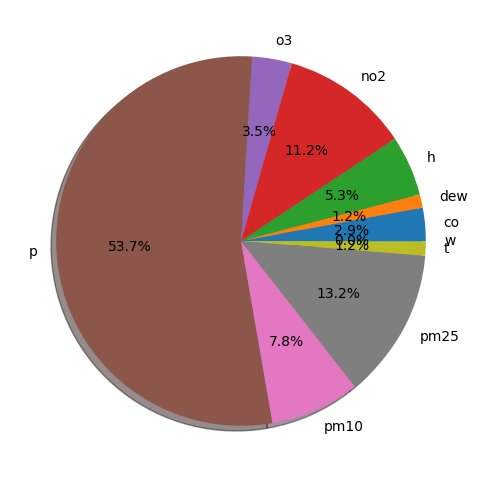

In [5]:
import matplotlib.pyplot as plt
pollutants=[i for i in iaqi]
values=[i['v'] for i in iaqi.values()]
print(pollutants)
print(values)
plt.figure(figsize=(8,6))

plt.pie(values,labels=pollutants,autopct='%1.1f%%',shadow=True)

plt.show()

Plotting location on the map using cartopy

Installing cartopy in colab

In [6]:
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libproj-dev is already the newest version (9.3.1-1~jammy0).
libproj-dev set to manually installed.
proj-data is already the newest version (9.3.1-1~jammy0).
proj-data set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 205 kB of archives.
After this operation, 521 kB of additional disk space will be used.
Get:1 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 proj-bin amd64 9.3.1-1~jammy0 [205 kB]
Fetched 205 kB in 1s (230 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 126284 files and directories currently installed.)
Preparing to unpack .../proj-bin_9.3.1-1~jammy0_amd64.deb ...
Unpacking proj-bin (9.3.1-1~jammy0) ...
Setting up proj-bin (9.3.1-1~jammy0) ...
Processing triggers for man-db (2.10.2-1) ...
Reading package lists... Don

In [7]:
!pip uninstall shapely
!pip install shapely --no-binary shapely

Found existing installation: shapely 2.1.1
Uninstalling shapely-2.1.1:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/shapely-2.1.1.dist-info/*
    /usr/local/lib/python3.11/dist-packages/shapely.libs/libgeos-3ef06f11.so.3.13.1
    /usr/local/lib/python3.11/dist-packages/shapely.libs/libgeos_c-abcdd5fa.so.1.19.2
    /usr/local/lib/python3.11/dist-packages/shapely/*
Proceed (Y/n)? Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/uninstall.py", line 106, in run
    uninstall_pathset = req.uninstall(
                        ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/req/req_install.py", line 722, in uninstall
    uninstalled_pathset.remove(auto_confirm, verbose)
  File "/usr/local/lib/python3.11/dist-packages/pip/_

Plotting a map of the city

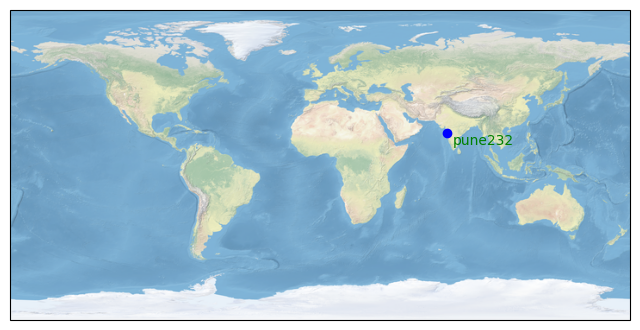

In [8]:
import cartopy.crs as ccrs
geo=data['city']['geo']
fig=plt.figure(figsize=(8,6))
ax=plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
plt.scatter(geo[1],geo[0],color='blue')
plt.text(geo[1]+3,geo[0]-7,f'{city}{aqi}',color='green')
plt.show()



# Historical data analysis

In [9]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

data extractyd from : http://aqicn.org/data-platform/register/

reading downloaded csv


In [ ]:
 import pandas as pd
 csv_path = '/content/drive/MyDrive/igi-airport terminal-3, delhi, delhi, india-air-quality.csv'
 df=pd.read_csv(csv_path)
 df=df.head(50)#50 rows out of whole data
 df

new columns


In [ ]:
df.columns
df= df.rename(columns = {" pm25": "pm25",
                         " pm10":"pm10",
                         " o3": "o3",
                         ' no2' : 'no2',
                         ' so2' : 'so2',
                         ' co' : 'co'})

df.columns

Extract dates of lockdown

In [ ]:
df['date'] = pd.to_datetime(df.date)
df['date']#dates only date format me hai using this
df21=df.loc[df['date'] >'2017-03-24']
df21=df21.sort_values(by='date')
df21

Remove any extra date apart from 21 days

In [ ]:
df21.drop(13, inplace=True)
df21

Filling all the empty cells with 0

In [ ]:
df21.replace(' ', '0', inplace=True)
df21

Plotting the data

In [ ]:
import matplotlib.pyplot as plt

dates=df21['date']
pm25=df21['pm25']
pm25=[int(i) for i in pm25]

plt.figure(figsize=(10,9))
plt.scatter(dates,pm25,color='lightblue')
plt.xticks(rotation=100,color='red')
plt.plot(dates,pm25,color='yellow')
plt.title('PM2.5 value of delhi in assigned days MANAS')
plt.xlabel('MANAS .DATES',color='green')
plt.ylabel('PM2.5 values',color='green')
plt.show()

Compairing the two

In [ ]:
import matplotlib.pyplot as plt

dates = df21['date']
pm25_l = df21['pm25']
pm25_l = [int(i) for i in pm25_l]
dates = df21['date']
pm25_n = df21['pm25']
pm25_n = [int(i) for i in pm25_n]
plt.figure(figsize=(10,6))

length_n = [i for i in range(1,len(pm25_n)+1)]#Length for  lockdown' data

plt.plot(length_n,pm25_n,color='red',label='varying dataa in lockdown')
plt.legend()
plt.title('Comparision of both values')
plt.show()

### Bar chart of individual air quality components

In [ ]:
import matplotlib.pyplot as plt

pollutants = [i for i in iaqi]
values = [i['v'] for i in iaqi.values()]

plt.figure(figsize=(10, 6))
plt.bar(pollutants, values, color='skyblue')
plt.xlabel('Pollutants')
plt.ylabel('Values')
plt.title('Individual Air Quality Components')
plt.show()

### Time series plots for other pollutants in historical data

In [ ]:
import matplotlib.pyplot as plt

dates = df21['date']
pollutants_to_plot = ['pm10', 'o3', 'no2', 'co']

plt.figure(figsize=(12, 8))

for pollutant in pollutants_to_plot:
    values = df21[pollutant]
    values = [int(i) for i in values]
    plt.plot(dates, values, label=pollutant)

plt.xticks(rotation=100, color='red')
plt.title('Historical values of different pollutants in Delhi')
plt.xlabel('Dates', color='green')
plt.ylabel('Values', color='green')
plt.legend()
plt.grid(True)
plt.show()